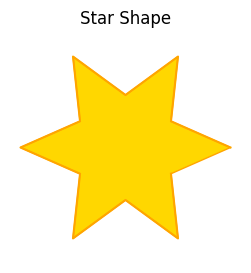

In [42]:
import numpy as np
import matplotlib.pyplot as plt


def star_points(radius, points=6):
    angle = np.linspace(0, 2 * np.pi, points * 2, endpoint=False)
    inner_radius = radius / 2  
    x = []
    y = []
    
    for i in range(len(angle)):
        r = inner_radius if i % 2 else radius
        x.append(r * np.cos(angle[i]))
        y.append(r * np.sin(angle[i]))
    
    return x, y

radius = 10


x, y = star_points(radius)

# วาดกราฟดาว
plt.figure(figsize=(5, 3))
plt.fill(x, y, 'gold', edgecolor='orange') 
plt.plot(x, y, color='orange') 
plt.xlim([-radius-1, radius+1])
plt.ylim([-radius-1, radius+1])
plt.gca().set_aspect('equal', adjustable='box')  

# แสดงกราฟ
plt.title("Star Shape")
plt.axis('off')  
plt.show()


In [43]:
import pygame
import random

# เริ่มต้นการใช้งาน Pygame
pygame.init()

# กำหนดขนาดหน้าจอ
screen_width = 800
screen_height = 600
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("หลายดาวกำลังเคลื่อนที่")

# กำหนดสี
WHITE = (255, 255, 255)
YELLOW = (255, 255, 0)

# สร้างคลาสสำหรับดาว
class Star:
    def __init__(self, x, y, speed_x, speed_y):
        self.x = x
        self.y = y
        self.speed_x = speed_x
        self.speed_y = speed_y

    def move(self):
        self.x += self.speed_x
        self.y += self.speed_y

        if self.x > screen_width or self.x < 0:
            self.speed_x = random.choice([5, -5])

        if self.y > screen_height or self.y < 0:
            self.speed_y = random.choice([5, -5])

    def draw(self, screen):
        pygame.draw.circle(screen, YELLOW, (self.x, self.y), 30)

# สร้างดาวหลายดวง
stars = [Star(random.randint(0, screen_width), random.randint(0, screen_height), random.choice([5, -5]), random.choice([5, -5])) for _ in range(125)]

# ตั้งค่าระดับ FPS
clock = pygame.time.Clock()
FPS = 60

# ลูปหลักของโปรแกรม
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # ล้างหน้าจอ
    screen.fill(WHITE)

    # เคลื่อนที่และวาดดาวทั้งหมด
    for star in stars:
        star.move()
        star.draw(screen)

    # อัพเดตหน้าจอ
    pygame.display.flip()

    # ตั้งค่าระดับ FPS
    clock.tick(FPS)

# ออกจาก Pygame
pygame.quit()
